## Решение краевой задачи для ОДУ второго порядка сеточным методом.

In [1]:
from numpy import eye, zeros
from numpy.linalg import solve, norm
import math
import matplotlib.pyplot as plt

In [2]:
def solution(p, q, r, f, h, a, b, alpha0, alpha1, beta0, beta1, alpha, beta):
    N = round((b - a) / h)
    x_array = [a+i*h for i in range(N+1)]
    A = eye(N+1)
    d = zeros(N+1)
    
    def find_Aij(i, j):
        if j > i:
            return 2 * p(x_array[i]) + h * q(x_array[i])
        elif j < i: 
            return 2 * p(x_array[i]) - h * q(x_array[i])
        else:
            return 2 * h ** 2 * r(x_array[i]) - 4 * p(x_array[i])
        
    def find_di(i):
        if i == 0:
            return h * alpha
        elif i == N:
            return h * beta
        else:
            return 2 * h ** 2 * f(x_array[i]) 
    
    
    for i in range(N + 1):
        d[i] = find_di(i)
        
        if i == 0:
            A[i, 0] = h * alpha0 - alpha1
            A[i, 1] = alpha1
        elif i == N:
            A[i, i-1] = -beta1
            A[i, i] = h * beta0 + beta1 
        else:
            for j in range(i-1, i + 2):
                A[i, j] = find_Aij(i, j)

    u_array = solve(A, d)
    return u_array

In [3]:
def accuracy_control(p, q, r, f, h, a, b, alpha0, alpha1, beta0, beta1, alpha, beta, eps):
    k = 0
    v2 = solution(p, q, r, f, h, a, b, alpha0, alpha1, beta0, beta1, alpha, beta)
    while True:
        h = h / 2
        k += 1
        v1 = v2
        v2 = solution(p, q, r, f, h, a, b, alpha0, alpha1, beta0, beta1, alpha, beta)
        delta = [(v2[i * 2] - v1[i]) for i in range(v1.shape[0])]
        
        if norm(delta) < eps:
            for i in range(len(delta)):
                if i % 2 == 0:
                    v2[i * 2] += delta[i]
                else:
                    v2[i] += (delta[i - 1] + delta[i + 1]) / 2
            x = zeros(v2.shape[0])
            
            for i in range(v2.shape[0]):
                x[i] = a + i * h
            return x, v2, h, k

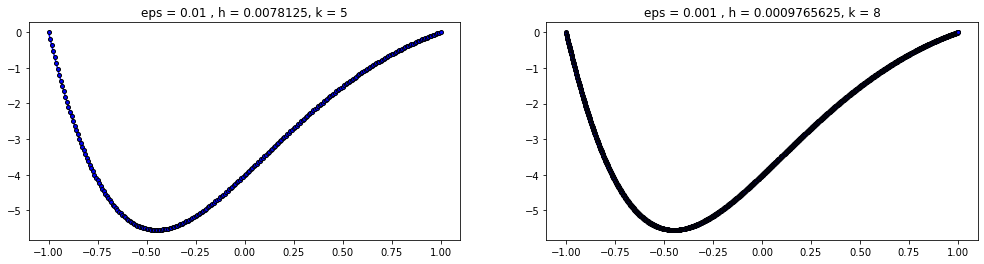

In [32]:
#3 вариант
fig, axes = plt.subplots(1, 2, figsize=(17, 4))
deg = 2

for i in range(2):
    eps = 10 ** -deg
    deg += 1
    x, y, h, k = accuracy_control(lambda x: -1/(x-3), lambda x: 1+x/2, lambda x: math.e ** (x/2), 
                                    lambda x: 2-x, 1/4, -1, 1, 1, 0, 1, 0, 0, 0, eps)
    axes[i].plot(x, y, marker='.', color='blue', mec='black', ms=8)
    axes[i].set_title("eps = {} , h = {}, k = {}".format(eps, h, k))

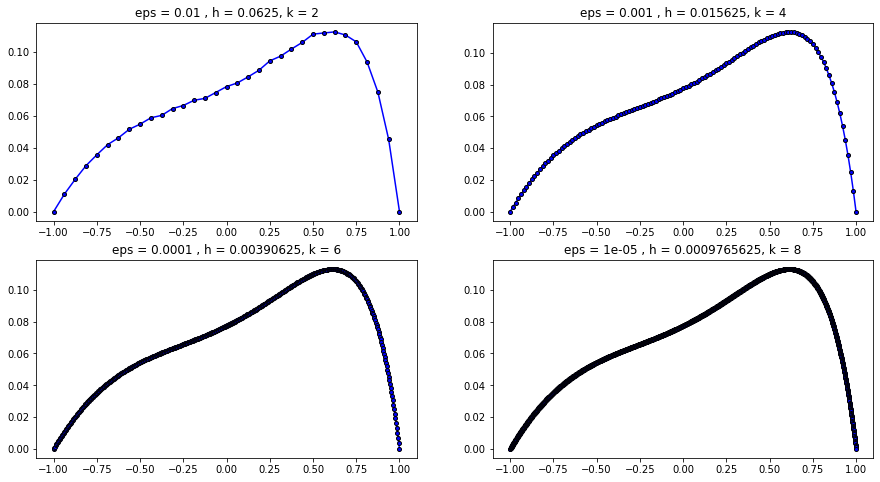

In [33]:
#6 вариант
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
deg = 2

for i in range(2):
    for j in range(2):
        eps = 10 ** -deg
        deg += 1
        x, y, h, k = accuracy_control(lambda x: (x-2)/(x+2), lambda x: x, lambda x: 1-math.sin(x), lambda x: x**2, 
                                      1/4, -1, 1, 1, 0, 1, 0, 0, 0, eps)
        axes[i, j].plot(x, y, marker='.', color='blue', mec='black', ms=8)
        axes[i, j].set_title("eps = {} , h = {}, k = {}".format(eps, h, k))

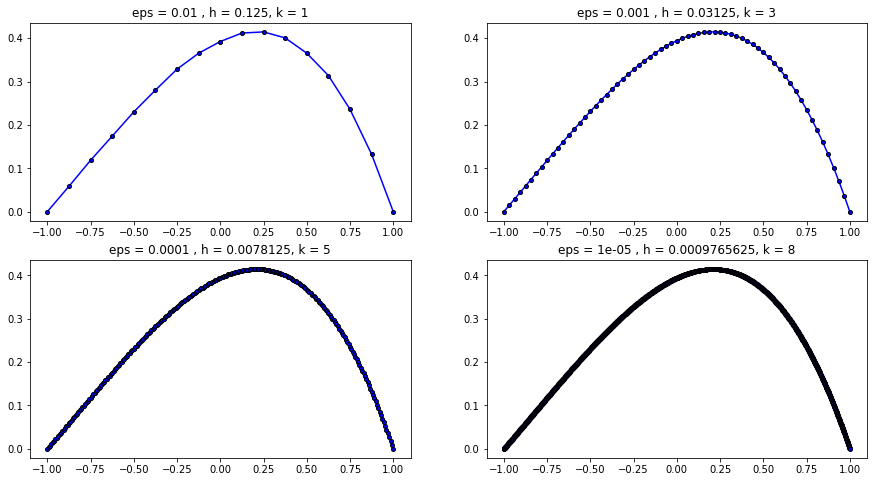

In [37]:
#8 вариант
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
deg = 2

for i in range(2):
    for j in range(2):
        eps = 10 ** -deg
        deg += 1
        x, y, h, k = accuracy_control(lambda x: -(4-x)/(5-2*x), lambda x: 1-x/2, lambda x: 1/2*math.log(3+x), 
                                    lambda x: 1+x/3, 1/4, -1, 1, 1, 0, 1, 0, 0, 0, eps)
        axes[i, j].plot(x, y, marker='.', color='blue', mec='black', ms=8)
        axes[i, j].set_title("eps = {} , h = {}, k = {}".format(eps, h, k))